In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows' ,70)
pd.set_option('display.max_columns', 70)

import warnings
warnings.filterwarnings('ignore')

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Data_dictionary = pd.read_csv('metaData.csv')

In [3]:
train.isna().sum()

ID                                                 0
source                                             0
name                                               1
description                                       57
neighborhood_overview                           1823
host_name                                          0
host_since                                         0
host_location                                   1280
host_about                                      2270
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                              63
host_is_superhost                                  0
host_neighbourhood                              3460
host_listings_count                                0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                 

Number of outlier :  100 
Percentage of outlier  1.4285714285714286


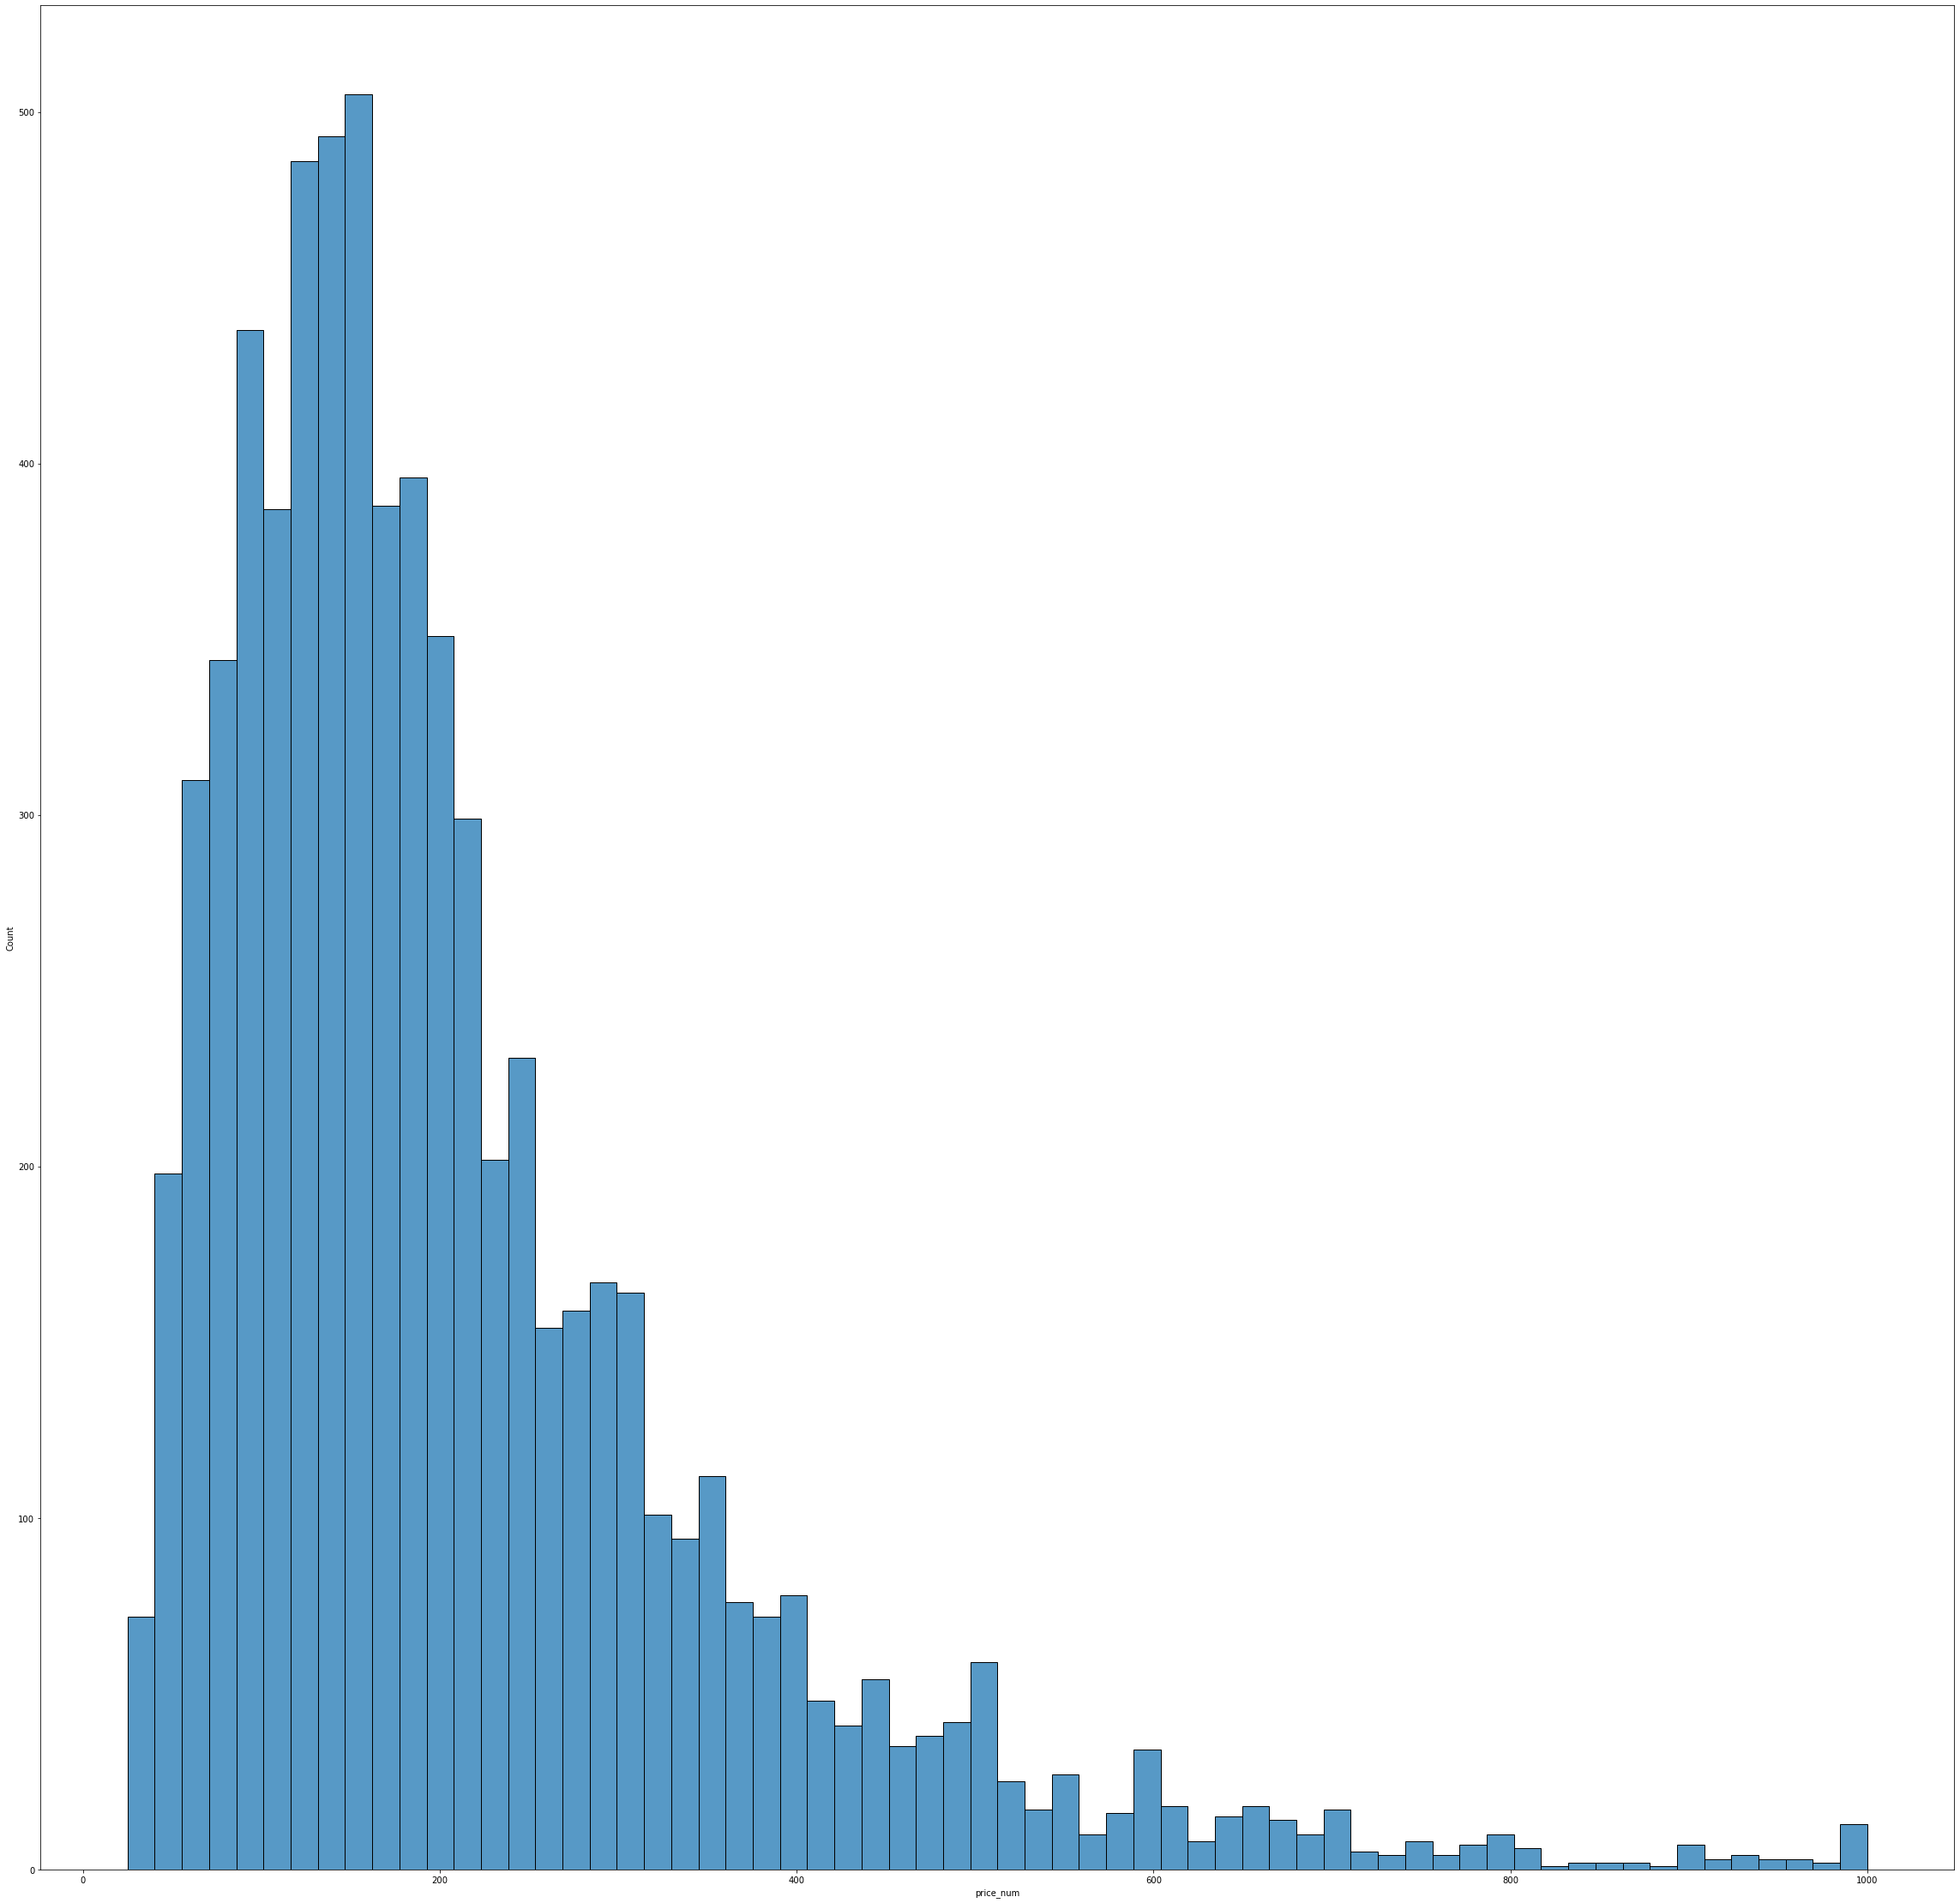

In [4]:

train['price_num'] = train['price'].str.replace('$', '').str.replace(',','').astype(float)
print('Number of outlier : ', train[train['price_num'] >= 1000].shape[0], 
        '\nPercentage of outlier ' ,(train[train['price_num'] >= 1000].shape[0] / len(train))*100 )

plt.figure(figsize=(40,40))
sns.histplot(train[train['price_num'] <= 1000]['price_num'].astype(int))
plt.show()

In [5]:
train = train[train['price_num'] <=1000]


train['host_since'] = pd.to_datetime(train['host_since'])
test['host_since'] = pd.to_datetime(test['host_since'])

train['first_review'] = pd.to_datetime(train['first_review'])
test['first_review'] = pd.to_datetime(test['first_review'])


train['last_review'] = pd.to_datetime(train['last_review'])
test['last_review'] = pd.to_datetime(test['last_review'])


In [6]:
train['host_since'].dt.month

0        3
1        9
2       11
3        6
4        7
        ..
6995     6
6996    12
6997    11
6998     7
6999     1
Name: host_since, Length: 6910, dtype: int64

In [7]:
train['operation_days'] = (datetime.now() -  train['host_since'] ).dt.days
test['operation_days'] = (datetime.now() -  test['host_since'] ).dt.days

In [8]:
train

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,price_num,operation_days
0,0,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,100%,98%,f,Richmond,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,t,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11,$132.00,132.0,3718
1,1,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,100%,98%,f,Brunswick,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,t,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37,$39.00,39.0,4995
2,2,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,2011-11-28,"Melbourne, Australia",I have very special interests in Life and Life...,within a few hours,100%,78%,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,t,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09,$270.00,270.0,4192
3,3,city scrape,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,2010-06-13,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,within a day,75%,92%,f,Southbank,4.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.82163,144.96672,Private room in rental unit,Private room,2,2.5 baths,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,t,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,f,1,0,1,0,0.01,"$1,000.00",1000.0,4725
4,4,city scrape,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within a few hours,100%,87%,t,NaN,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936,Entire rental unit,Entire home/apt,5,1 bath,3.0,3.0,"[""Laundromat nearby"", ""Private patio or balcon...",1,14,1.0

In [9]:

train[['City', 'Country']] = train['host_location'].str.split(', ', expand=True)


test[['City', 'Country']] = test['host_location'].str.split(', ', expand=True)



In [10]:
train['host_acceptance_rate']  = (train['host_acceptance_rate'].str.replace('%', '').astype(float) /100).astype(float)
train['host_response_rate']  = (train['host_response_rate'].str.replace('%', '').astype(float) /100).astype(float)


test['host_acceptance_rate']  = (test['host_acceptance_rate'].str.replace('%', '').astype(float) /100).astype(float)
test['host_response_rate']  = (test['host_response_rate'].str.replace('%', '').astype(float) /100).astype(float)

In [11]:
train

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,price_num,operation_days,City,Country
0,0,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,1.00,0.98,f,Richmond,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,t,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11,$132.00,132.0,3718,Melbourne,Australia
1,1,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,1.00,0.98,f,Brunswick,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,t,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37,$39.00,39.0,4995,Melbourne,Australia
2,2,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,2011-11-28,"Melbourne, Australia",I have very special interests in Life and Life...,within a few hours,1.00,0.78,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,t,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09,$270.00,270.0,4192,Melbourne,Australia
3,3,city scrape,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,2010-06-13,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,within a day,0.75,0.92,f,Southbank,4.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.82163,144.96672,Private room in rental unit,Private room,2,2.5 baths,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,t,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,f,1,0,1,0,0.01,"$1,000.00",1000.0,4725,Melbourne,Australia
4,4,city scrape,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within a few hours,1.00,0.87,t,NaN,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936,Entire rental un

In [12]:
Train_feature = ['source','description','neighborhood_overview','host_since','host_location', 'host_response_time','host_response_rate',
                'host_acceptance_rate',  'host_is_superhost','host_neighbourhood', 'host_listings_count' ]

In [13]:
train.columns

Index(['ID', 'source', 'name', 'description', 'neighborhood_overview',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_

In [14]:
Data_dictionary

,Column,Type,Description
0,ID,integer,index
1,source,text,"""previous scrape"" means that the listing was ..."
2,name,text,Name of the listing
3,description,text,Detailed description of the listing
4,neighborhood_overview,text,Host's description of the neighbourhood
5,host_name,text,Name of the host. Usually just the first name(s).
6,host_since,date,The date the host/user was created. For hosts ...
7,host_location,text,The host's self reported location
8,host_about,text,Description about the host
9,host_response_time,NaN,NaN


In [15]:
train['host_neighbourhood']

0        Richmond
1       Brunswick
2             NaN
3       Southbank
4             NaN
          ...    
6995     Carnegie
6996          NaN
6997          NaN
6998          NaN
6999          NaN
Name: host_neighbourhood, Length: 6910, dtype: object

In [16]:
train.head(5)

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,price_num,operation_days,City,Country
0,0,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,1.00,0.98,f,Richmond,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,t,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11,$132.00,132.0,3718,Melbourne,Australia
1,1,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,1.00,0.98,f,Brunswick,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,t,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37,$39.00,39.0,4995,Melbourne,Australia
2,2,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,2011-11-28,"Melbourne, Australia",I have very special interests in Life and Life...,within a few hours,1.00,0.78,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,t,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09,$270.00,270.0,4192,Melbourne,Australia
3,3,city scrape,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,2010-06-13,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,within a day,0.75,0.92,f,Southbank,4.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.82163,144.96672,Private room in rental unit,Private room,2,2.5 baths,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,t,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,f,1,0,1,0,0.01,"$1,000.00",1000.0,4725,Melbourne,Australia
4,4,city scrape,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within a few hours,1.00,0.87,t,NaN,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936,Entire rental un

In [17]:
Numerical_List = ['host_listings_count',  'latitude' , 'longitude' ,'accommodates' ,'bedrooms' , 'beds' ,'minimum_nights' ,'maximum_nights',
'minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights'	,'maximum_maximum_nights',	'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
	'availability_30', 	'availability_60'	,'availability_90', 	'availability_365',	'number_of_reviews'	,'number_of_reviews_ltm',	
    'number_of_reviews_l30d','review_scores_rating'	,'review_scores_accuracy'	,'review_scores_cleanliness','review_scores_checkin','review_scores_communication',	
    'review_scores_location',
    'review_scores_value' ,'calculated_host_listings_count'	,'calculated_host_listings_count_entire_homes'	,
    'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms'	,'reviews_per_month' ,'host_response_rate' ,'host_acceptance_rate']

In [27]:


X_train_features = pd.DataFrame()
X_test_features = pd.DataFrame()
train_filled_na = pd.DataFrame()
 
Ordinal_transform_list = ['source', 'host_is_superhost', 'host_has_profile_pic',
                            'host_identity_verified', 'property_type', 'room_type','bathrooms', 'instant_bookable',
                            'has_availability', 'host_response_time' , 'City' , 'Country']


enc = OrdinalEncoder(encoded_missing_value=np.nan, handle_unknown= 'use_encoded_value', unknown_value= np.nan)
X_train_features =  pd.DataFrame(enc.fit_transform(train[Ordinal_transform_list]), columns= Ordinal_transform_list)

X_test_features = pd.DataFrame(enc.transform(test[Ordinal_transform_list]), columns= Ordinal_transform_list)



In [28]:
amenities_count = []
for i in train['amenities'].values:
    i = eval(i)
    amenities_count.append(len(i))
X_train_features['No.amenities'] = pd.DataFrame(amenities_count)
X_train_features =  X_train_features.join(train[Numerical_List]).astype(float)


#TEST
amenities_count = []
for i in test['amenities'].values:
    i = eval(i)
    amenities_count.append(len(i))
X_test_features['No.amenities'] = pd.DataFrame(amenities_count)
X_test_features =  X_test_features.join(test[Numerical_List]).astype(float)


In [30]:

KNN_Imputer = KNNImputer(n_neighbors= 300, weights='distance' )
X_train_features = pd.DataFrame(KNN_Imputer.fit_transform(X_train_features), columns = X_train_features.columns)

#TEST
X_test_features = pd.DataFrame(KNN_Imputer.transform(X_test_features), columns = X_test_features.columns)


In [31]:
X_train_features.isna().sum()

source                                          0
host_is_superhost                               0
host_has_profile_pic                            0
host_identity_verified                          0
property_type                                   0
room_type                                       0
bathrooms                                       0
instant_bookable                                0
has_availability                                0
host_response_time                              0
City                                            0
Country                                         0
No.amenities                                    0
host_listings_count                             0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0


In [32]:
X_test_features

,source,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,bathrooms,instant_bookable,has_availability,host_response_time,City,Country,No.amenities,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate
0,0.0,1.0,1.0,1.0,17.0,0.0,2.0,1.0,0.0,3.000000,451.000000,0.000000,46.0,2.0,-37.861423,144.987549,4.0,2.0,2.000000,2.0,365.0,2.0,2.0,365.0,365.0,2.0,365.0,7.0,21.0,47.0,75.0,36.0,33.0,3.0,4.890000,4.94000,4.830000,4.860000,4.940000,4.810000,4.920000,1.0,1.0,0.0,0.0,2.580000,1.000000,0.990000
1,0.0,0.0,1.0,1.0,17.0,0.0,2.0,0.0,0.0,3.000000,299.000000,0.000000,27.0,2.0,-37.860130,144.972300,2.0,1.0,1.000000,1.0,60.0,1.0,4.0,4.0,60.0,1.0,59.5,17.0,43.0,73.0,73.0,30.0,25.0,5.0,4.530000,4.70000,4.500000,4.930000,4.770000,4.900000,4.470000,2.0,2.0,0.0,0.0,2.050000,1.000000,0.970000
2,0.0,0.0,1.0,1.0,39.0,2.0,26.0,1.0,0.0,3.000000,312.000000,0.000000,13.0,6.0,-37.804590,144.953250,1.0,1.0,1.000000,5.0,365.0,1.0,3.0,99.0,99.0,3.0,99.0,0.0,11.0,41.0,290.0,2.0,1.0,0.0,3.500000,4.00000,2.500000,3.000000,4.000000,5.000000,3.500000,6.0,0.0,4.0,2.0,0.150000,0.830000,0.990000
3,0.0,0.0,1.0,1.0,39.0,2.0,3.0,1.0,0.0,3.000000,312.000000,0.000000,13.0,6.0,-37.805250,144.953420,2.0,1.0,2.000000,5.0,365.0,1.0,3.0,99.0,99.0,2.9,99.0,15.0,44.0,74.0,337.0,14.0,13.0,2.0,4.500000,4.71000,4.570000,4.790000,4.710000,4.790000,4.570000,6.0,0.0,4.0,2.0,1.090000,0.830000,0.990000
4,0.0,0.0,1.0,1.0,39.0,2.0,4.0,1.0,0.0,3.000000,312.000000,0.000000,13.0,6.0,-37.803680,144.954980,2.0,1.0,2.000000,5.0,365.0,1.0,3.0,99.0,99.0,2.9,99.0,10.0,30.0,60.0,323.0,5.0,2.0,0.0,3.800000,3.60000,4.400000,4.400000,4.400000,4.600000,4.000000,6.0,0.0,4.0,2.0,0.380000,0.830000,0.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.0,0.0,1.0,1.0,42.0,2.0,2.0,0.0,0.0,2.560575,280.212950,1.541942,13.0,1.0,-37.820250,145.030880,2.0,1.0,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.500000,4.00000,5.000000,5.000000,5.000000,4.500000,4.500000,1.0,0.0,1.0,0.0,0.020000,0.943516,0.848673
2996,0.0,0.0,1.0,0.0,17.0,0.0,2.0,1.0,0.0,2.654489,278.736792,1.318722,40.0,36.0,-37.836240,144.992990,2.0,1.0,1.000000,1.0,90.0,3.0,7.0,90.0,90.0,4.0,90.0,1.0,1.0,1.0,268.0,42.0,9.0,0.0,4.210000,4.50000,4.290000,4.740000,4.640000,4.740000,4.190000,36.0,36.0,0.0,0.0,0.860000,0.956516,0.831294
2997,0.0,0.0,1.0,1.0,14.0,0.0,13.0,1.0,0.0,3.000000,269.478555,2.084738,42.0,36.0,-37.863260,144.754560,16.0,6.0,8.000000,2.0,365.0,2.0,2.0,365.0,365.0,2.0,365.0,9.0,39.0,69.0,340.0,0.0,0.0,0.0,4.609127,4.68588,4.622359,4.761838,4.737183,4.825805,4.541214,36.0,36.0,0.0,0.0,0.869156,1.000000,0.920000
2998,1.0,0.0,1.0,1.0,42.0,2.0,24.0,1.0,0.0,2.658787,268.000000,0.000000,10.0,2.0,-37.809130,144.960580,2.0,1.0,2.006365,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.000000,4.00000,3.000000,2.330000,3.330000,4.000000,3.330000,2.0,0.0,2.0,0.0,0.080000,0.955980,0.841644


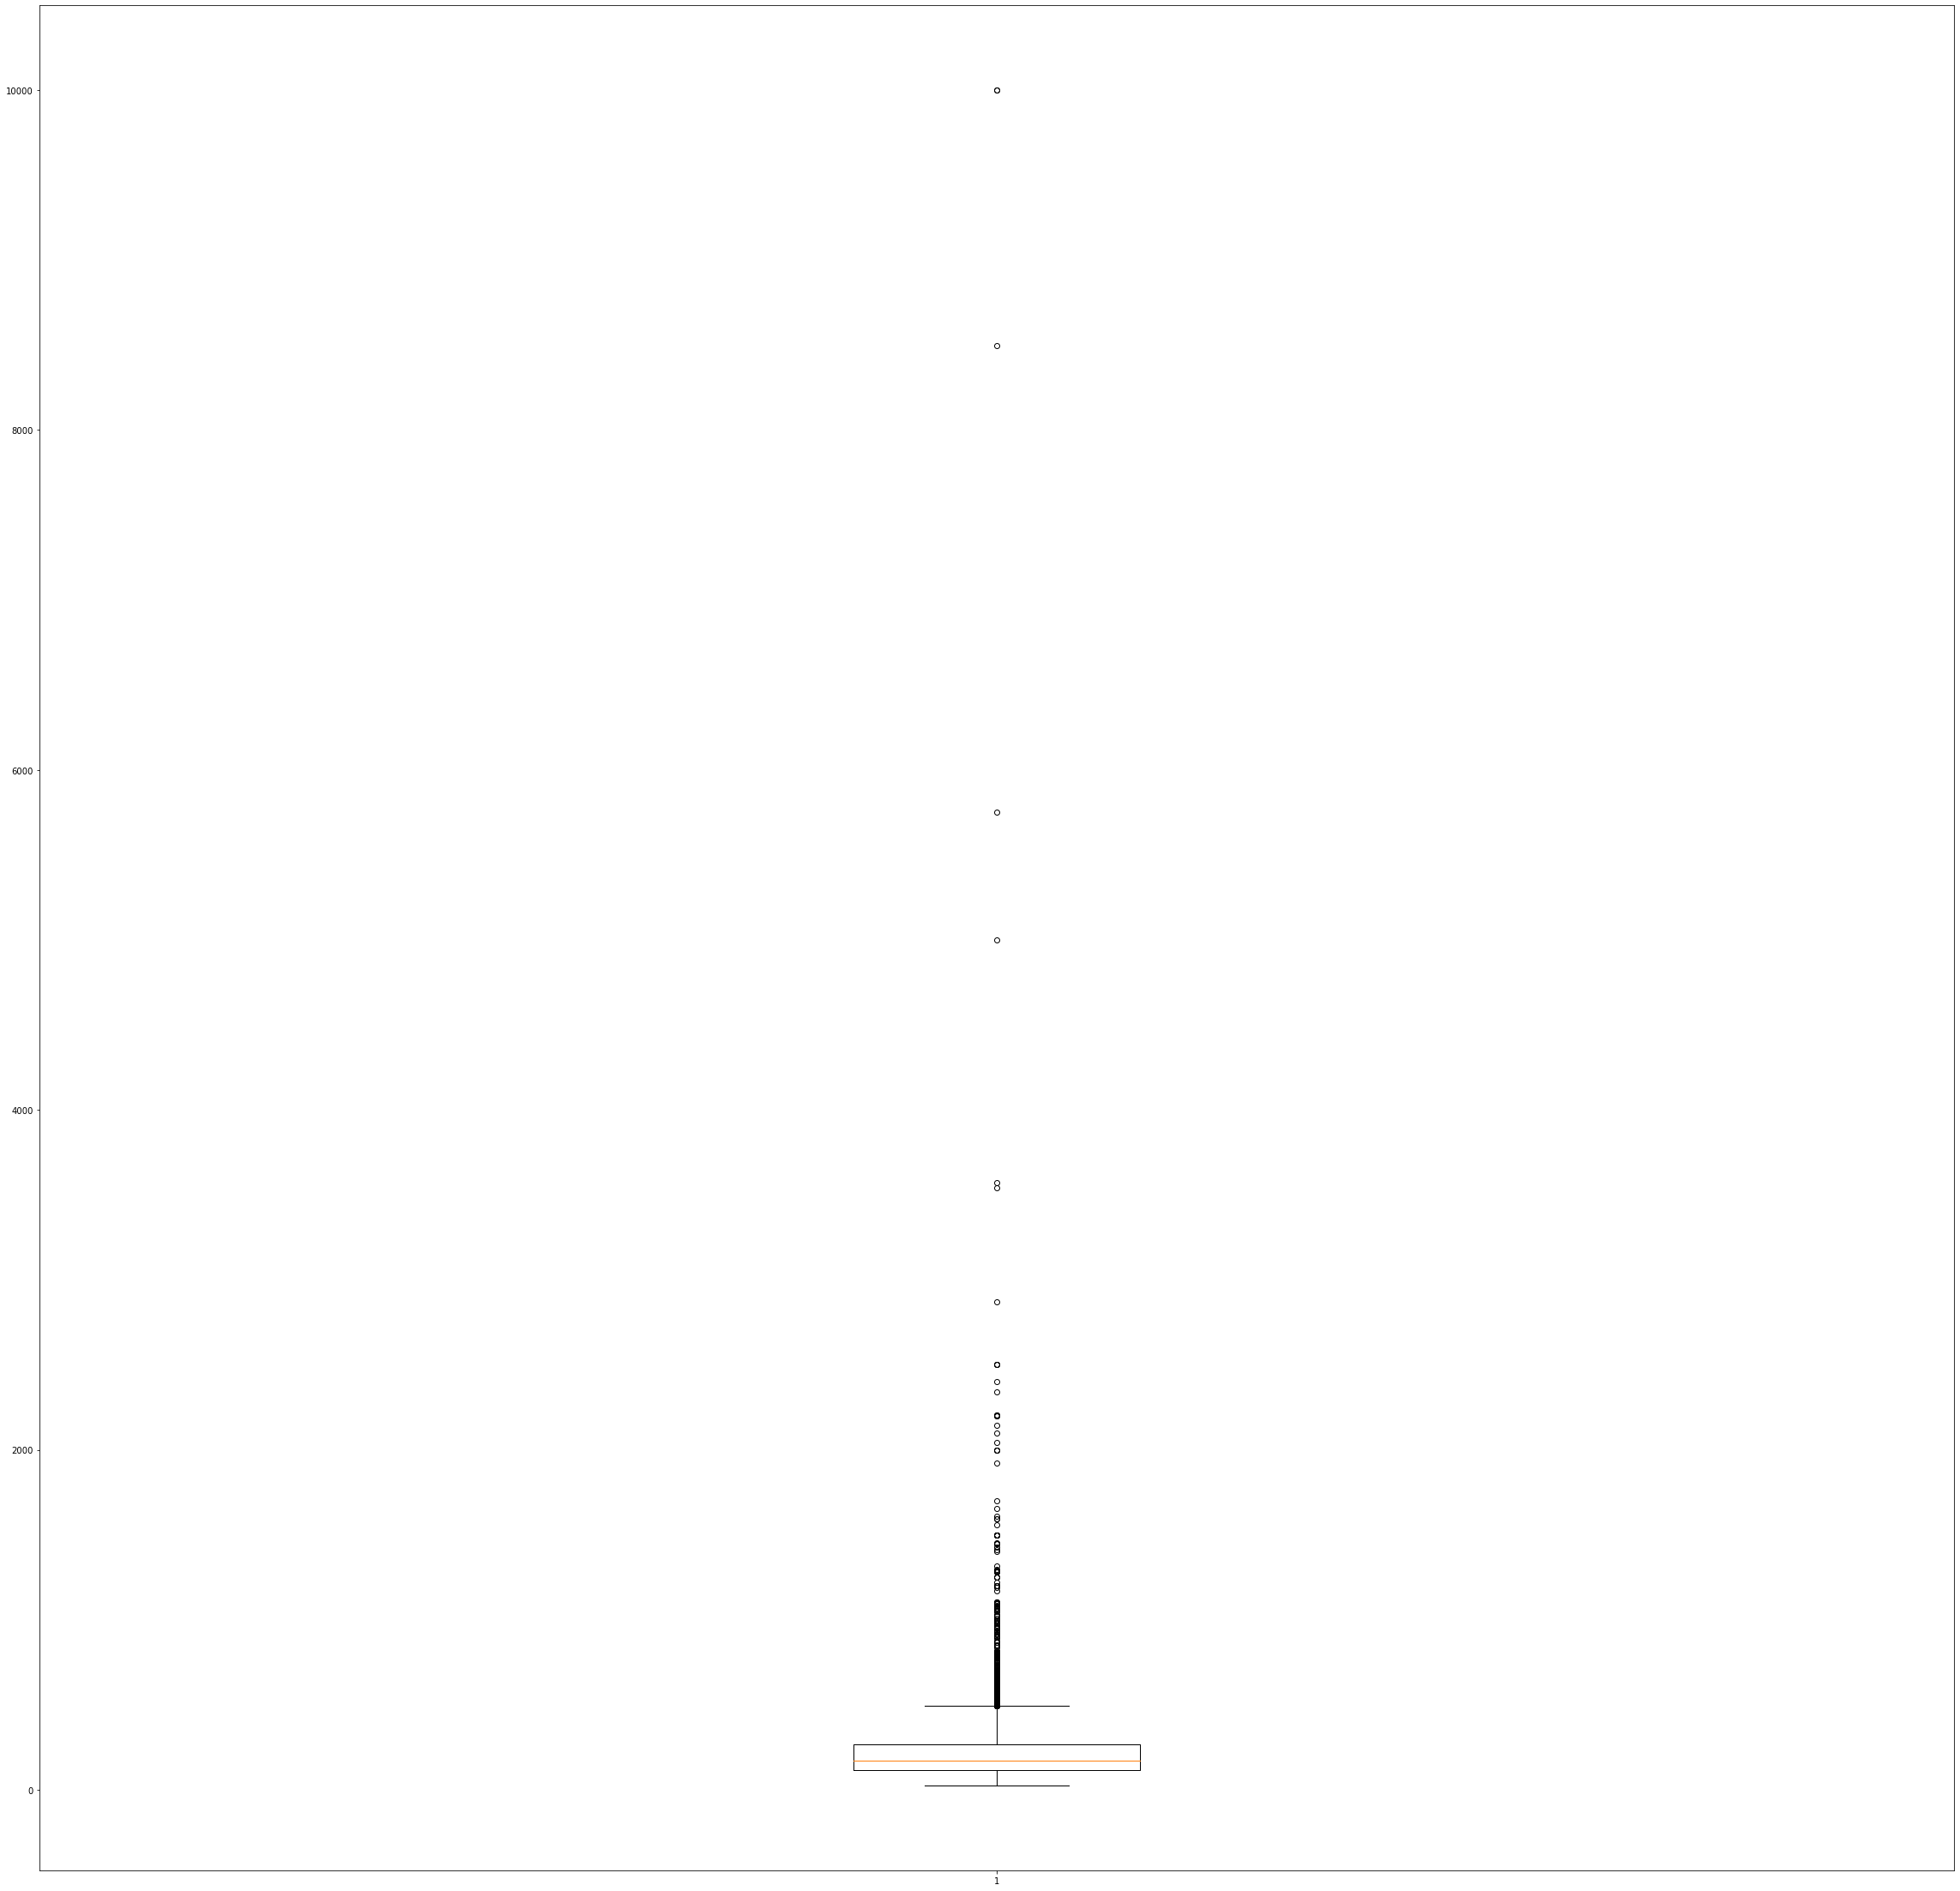

In [24]:
train[train['price_num'] >= 10000].shapeb.kj

AttributeError: 'DataFrame' object has no attribute 'shapeb'

In [208]:
9/7000

0.0012857142857142856

In [150]:
def sentiment_extract(text):
    # create a SentimentIntensityAnalyzer object
    sid = SentimentIntensityAnalyzer()
    # analyze the sentiment of the text
    scores = sid.polarity_scores(text)
    # print the sentiment scores
    result = []
    for i,a in scores.items():
        result.append((i, a))
    return result

In [153]:
from gensim.utils import simple_preprocess


simple_preprocess(text_test)


['room', 'in', 'cool', 'deco', 'apartment', 'in', 'brunswick', 'east']

In [152]:
text_test = train['name'][1]

In [19]:
text_test

'Room in Cool Deco Apartment in Brunswick East'

In [27]:
from pymongo import MongoClient
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tag import pos_tag 

import re
from gensim import corpora, models
from gensim.utils import simple_preprocess
from nltk.sentiment import SentimentIntensityAnalyzer


def remove_stopwords(words: list):
    result = []
    stop_words = set(stopwords.words('english'))
    for word in words:
        if word not in stop_words:
            result.append(word)
    return result

def stem_words(words:list):
    result = []
    ps: PorterStemmer = PorterStemmer()
    for word in words:
        result.append(ps.stem(word))
    return result

def keyword_to_csv(words:list):
    csv:str = ''
    for word in words:
        csv = csv + word + ','
    return csv[:-1]

def Entities_to_csv(entities:list):
    csv:str = ''
    row:str = ''
    for word in entities:
        row = word[0] + ',' + str(word[1])
        csv = csv + row + '\n'
    return csv[:-1]

def extract_topic(words):
    result = []
    dictionary = corpora.Dictionary([words])
    corpus = [dictionary.doc2bow(doc) for doc in [words]]
    # Build LDA model
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=1)
        # Print topics
    topics = lda_model.get_topic_terms(topicid=0, topn=10)
    for word_id, prob in topics:
        result.append((dictionary[word_id] , prob))
    return result

def sentiment_extract(text):
    # create a SentimentIntensityAnalyzer object
    sid = SentimentIntensityAnalyzer()
    # analyze the sentiment of the text
    scores = sid.polarity_scores(text)
    # print the sentiment scores
    result = []
    for i,a in scores.items():
        result.append([i, a])
    return result


In [28]:
   words = stem_words(remove_stopwords(word_tokenize(text_test)))

In [29]:
extract_topic(words)

[('east', 0.16666669),
 ('deco', 0.16666667),
 ('apart', 0.16666666),
 ('brunswick', 0.16666666),
 ('cool', 0.16666666),
 ('room', 0.16666666)]

In [31]:
pd.DataFrame(sentiment_extract(text_test))

,0,1
0,neg,0.0000
1,neu,0.7530
2,pos,0.2470
3,compound,0.3182


In [32]:
sentiment_extract(text_test)

[['neg', 0.0], ['neu', 0.753], ['pos', 0.247], ['compound', 0.3182]]

In [365]:
train

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,price_num,operation_days,City,Country
0,0,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,1.00,0.98,f,Richmond,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,t,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11,$132.00,132.0,3718,Melbourne,Australia
1,1,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,1.00,0.98,f,Brunswick,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,t,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37,$39.00,39.0,4995,Melbourne,Australia
2,2,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,2011-11-28,"Melbourne, Australia",I have very special interests in Life and Life...,within a few hours,1.00,0.78,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,t,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09,$270.00,270.0,4192,Melbourne,Australia
3,3,city scrape,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,2010-06-13,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,within a day,0.75,0.92,f,Southbank,4.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.82163,144.96672,Private room in rental unit,Private room,2,2.5 baths,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,t,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,f,1,0,1,0,0.01,"$1,000.00",1000.0,4725,Melbourne,Australia
4,4,city scrape,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within a few hours,1.00,0.87,t,NaN,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936,Entire rental un

In [366]:
test

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7000,city scrape,Spacious Art Deco Apartment in St Kilda,This Art Deco apartment is a unique find with ...,NaN,Rebecca,2016-11-29,"Victoria, Australia",A Melburnian primary school teacher. I love to...,within an hour,100%,99%,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Port Phillip,-37.861423,144.987549,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Laundromat nearby"", ""Microwave"", ""Coffee"", ""...",2,365,2.0,2,365,365.0,2.0,365.0,t,7,21,47,75.0,36,33,3,2022-01-20,2023-03-04,4.89,4.94,4.83,4.86,4.94,4.81,4.92,t,1,1,0,0,2.58
1,7001,city scrape,Beach frontage block just meters to Fitzroy St,Positioned on the beach of St Kilda West and ...,The property is set on Beaconsfield Parade in ...,Bookings@,2016-11-22,"Murrumbeena, Australia",We are professional property managers who look...,within an hour,100%,97%,f,Collingwood,2.0,"['email', 'phone', 'work_email']",t,t,"Saint Kilda West, Victoria, Australia",Port Phillip,-37.860130,144.972300,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Lake access"", ""Laundromat nearby"", ""Ceiling ...",1,60,1.0,4,4,60.0,1.0,59.5,t,17,43,73,73.0,30,25,5,2022-01-01,2023-03-04,4.53,4.70,4.50,4.93,4.77,4.90,4.47,f,2,2,0,0,2.05
2,7002,city scrape,CarricHouse single Room with Shared bathroom,Single room with shared bathroom( only share w...,NaN,CarricHouse,2021-01-14,"North Melbourne, Australia","CarricHouse provide a home feeling, luxury- ho...",within an hour,83%,99%,f,NaN,6.0,"['email', 'phone', 'work_email']",t,t,NaN,Melbourne,-37.804590,144.953250,Private room in hostel,Private room,1,Shared half-bath,1.0,1.0,"[""BBQ grill"", ""Smoke alarm"", ""City skyline vie...",5,365,1.0,3,99,99.0,3.0,99.0,t,0,11,41,290.0,2,1,0,2022-02-14,2022-04-07,3.50,4.00,2.50,3.00,4.00,5.00,3.50,t,6,0,4,2,0.15
3,7003,city scrape,CarricHouse Twin Shared Room with En-suite,"Twin shared room with En-suite, shared commerc...",NaN,CarricHouse,2021-01-14,"North Melbourne, Australia","CarricHouse provide a home feeling, luxury- ho...",within an hour,83%,99%,f,NaN,6.0,"['email', 'phone', 'work_email']",t,t,NaN,Melbourne,-37.805250,144.953420,Private room in hostel,Private room,2,1 private bath,1.0,2.0,"[""BBQ grill"", ""Smoke alarm"", ""City skyline vie...",5,365,1.0,3,99,99.0,2.9,99.0,t,15,44,74,337.0,14,13,2,2022-02-22,2023-03-01,4.50,4.71,4.57,4.79,4.71,4.79,4.57,t,6,0,4,2,1.09
4,7004,city scrape,CarricHouse Twin shared Room with Shared Bathroom,Twin shared room with shared bathroom (only sh...,NaN,CarricHouse,2021-01-14,"North Melbourne, Australia","CarricHouse provide a home feeling, luxury- ho...",within an hour,83%,99%,f,NaN,6.0,"['email', 'phone', 'work_email']",t,t,NaN,Melbourne,-37.803680,144.954980,Private room in hostel,Private room,2,1 shared bath,1.0,2.0,"[""BBQ grill"", ""Smoke alarm"", ""City skyline vie...",5,365,1.0,3,99,99.0,2.9,99.0,t,10,30,60,323.0,5,2,0,2022-02-08,2022-10-03,3.80,3.60,4.40,4.40,4.40,4.60,4.00,t